# Grammatical Errors Dataset
- Do the LMs express similar trends for these datasets?

In [7]:
import os, sys, time
sys.path.append("../")

import src.anomaly_model

import numpy as np 
import torch
import transformers 
import pprint 
pprint = pprint.PrettyPrinter()

import matplotlib.pyplot as plt
%matplotlib inline

from utils import timed_func

In [2]:
@timed_func
def parse_grammar_dataset():
    m2_path = "../data/BEA14/WI_LOCNESS/wi+locness/m2/A.train.gold.bea19.m2"
    with open(m2_path, "r") as f:
        raw_lines = f.readlines()

    data = []
    curr_item = {}
    for line in raw_lines:
        if line.startswith("S "):
            if len(curr_item) > 0 and len(curr_item["errors"]) > 0:
                data.append(curr_item)
            curr_item = {"sentence": line[2:], "errors": []}
        elif line.startswith("A "):
            items = line.split("|||")
            start_pos_str, end_pos_str = items[0][2:].split()
            start_pos, end_pos = int(start_pos_str), int(end_pos_str)
            error = {
                "start_pos": start_pos,  # These are in terms of word locs
                "end_pos": end_pos,
                "correct": items[2] 
            }
            curr_item["errors"].append(error)

    print("Collected {} sentences".format(len(data)))
    sentences = [item['sentence'] for item in data]
    return data, sentences 

gec_data, sentences = parse_grammar_dataset()
    
        

Collected 10492 sentences
parse_grammar_dataset done in 0.09 seconds.


```
This is an example of what an M2 file looks like
S It 's difficult answer at the question " what are you going to do in the future ? " if the only one who has to know it is in two minds .
A 3 3|||M:VERB:FORM|||to|||REQUIRED|||-NONE-|||0
A 4 5|||U:PREP||||||REQUIRED|||-NONE-|||0
```


In [3]:
line = "A 6 6|||M:PUNCT|||,|||REQUIRED|||-NONE-|||0"
line.split("|||")

['A 6 6', 'M:PUNCT', ',', 'REQUIRED', '-NONE-', '0']

In [4]:
model = src.anomaly_model.AnomalyModel(sentences)

In [15]:
def all_layer_scores(sent):
  tokens, all_layer = model.gmm_score([sent])
  tokens = tokens[0]
  all_layer = all_layer[0]
  plt.figure(figsize=(8, 8))
  plt.imshow(all_layer, origin='lower')
  plt.xticks(range(len(tokens)), tokens, rotation='vertical')
  plt.yticks(range(12), range(12))
  plt.ylabel('Layer')
  plt.show()

===== Example 0 =====
{'errors': [{'correct': '- sized', 'end_pos': 6, 'start_pos': 5}],
 'sentence': 'My town is a medium size city with eighty thousand inhabitants '
             '.\n'}


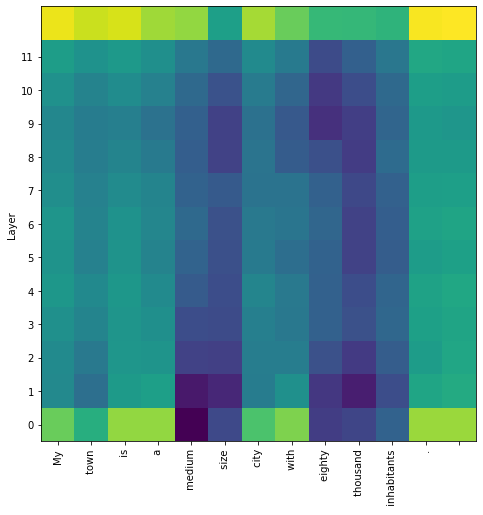

===== Example 1 =====
{'errors': [{'correct': '-', 'end_pos': 4, 'start_pos': 4},
            {'correct': 'of', 'end_pos': 7, 'start_pos': 7}],
 'sentence': 'It has a high density population because its small territory .\n'}


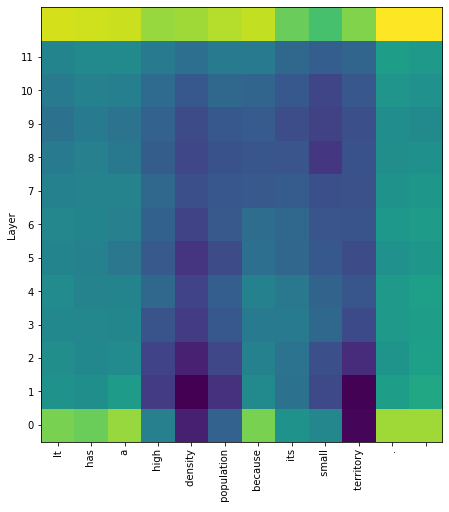

===== Example 2 =====
{'errors': [{'correct': 'Although', 'end_pos': 1, 'start_pos': 0},
            {'correct': '', 'end_pos': 2, 'start_pos': 1}],
 'sentence': 'Despite of it is an industrial city , there are many shops and '
             'department stores .\n'}


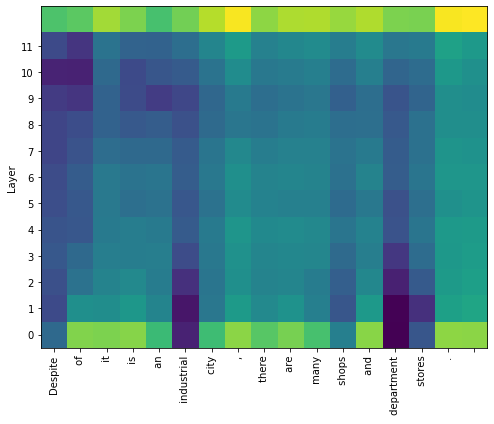

===== Example 3 =====
{'errors': [{'correct': 'center', 'end_pos': 9, 'start_pos': 8}],
 'sentence': 'I recommend visiting the artificial lake in the certer of the '
             'city which is surrounded by a park .\n'}


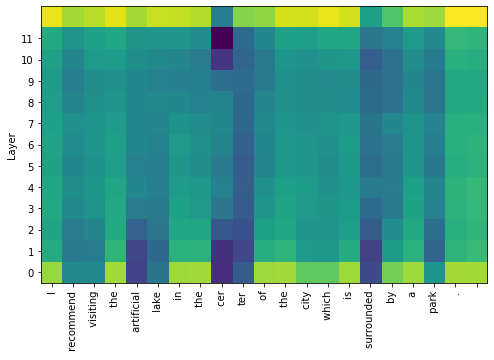

===== Example 4 =====
{'errors': [{'correct': 'Pasteries', 'end_pos': 1, 'start_pos': 0},
            {'correct': 'of', 'end_pos': 13, 'start_pos': 12}],
 'sentence': 'Pasteries are very common and most of them offer the special '
             'dessert from the city .\n'}


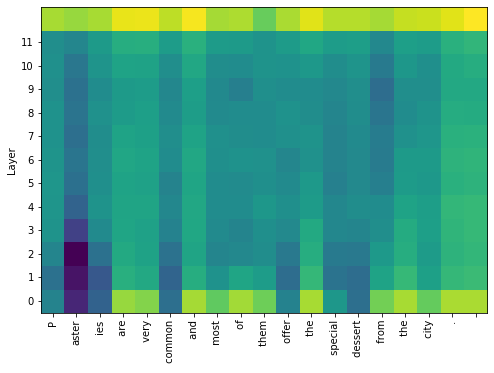

===== Example 5 =====
{'errors': [{'correct': 'is', 'end_pos': 2, 'start_pos': 1},
            {'correct': 'commercial', 'end_pos': 4, 'start_pos': 3},
            {'correct': 'kinds', 'end_pos': 18, 'start_pos': 17},
            {'correct': 'businesses', 'end_pos': 20, 'start_pos': 19},
            {'correct': 'grocers', 'end_pos': 39, 'start_pos': 38}],
 'sentence': 'There are a comercial zone along the widest street of the city '
             'where you can find all kind of establishments : banks , bars , '
             'chemists , cinemas , pet shops , restaurants , fast food '
             'restaurants , groceries , travel agencies , supermarkets and '
             'others .\n'}


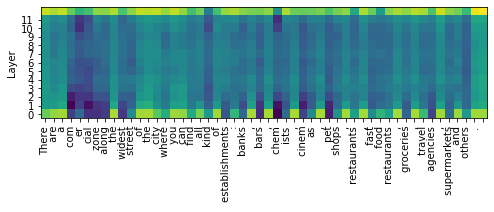

===== Example 6 =====
{'errors': [{'correct': 'in', 'end_pos': 8, 'start_pos': 8}],
 'sentence': 'Most of the shops have sales and offers at least three months of '
             'the year : January , June and August .\n'}


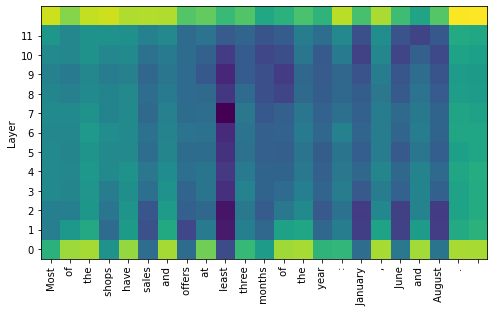

===== Example 7 =====
{'errors': [{'correct': 'is', 'end_pos': 8, 'start_pos': 7},
            {'correct': 'is', 'end_pos': 14, 'start_pos': 13},
            {'correct': '', 'end_pos': 15, 'start_pos': 14},
            {'correct': '. However ,', 'end_pos': 19, 'start_pos': 17},
            {'correct': 'recommend', 'end_pos': 21, 'start_pos': 20},
            {'correct': 'be', 'end_pos': 23, 'start_pos': 22},
            {'correct': 'careful', 'end_pos': 24, 'start_pos': 23},
            {'correct': 'of', 'end_pos': 25, 'start_pos': 24},
            {'correct': '', 'end_pos': 26, 'start_pos': 25}],
 'sentence': 'The quality of the products and services are quite good , '
             'because there are a huge competition , however I suggest you '
             'taking care about some fakes or cheats .\n'}


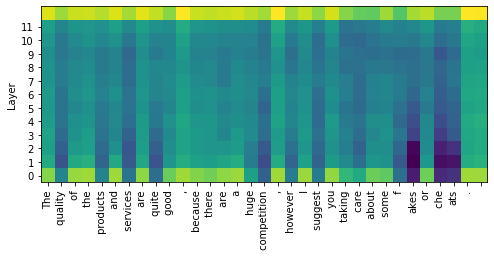

===== Example 8 =====
{'errors': [{'correct': '-NONE-', 'end_pos': -1, 'start_pos': -1}],
 'sentence': 'Everyone has his own plans .\n'}


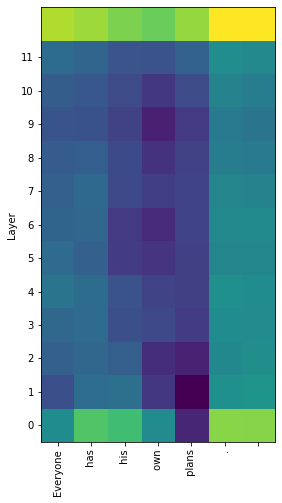

===== Example 9 =====
{'errors': [{'correct': 'Some people', 'end_pos': 1, 'start_pos': 0},
            {'correct': 'others', 'end_pos': 8, 'start_pos': 7}],
 'sentence': 'People want to be a doctor , other want to be a teacher .\n'}


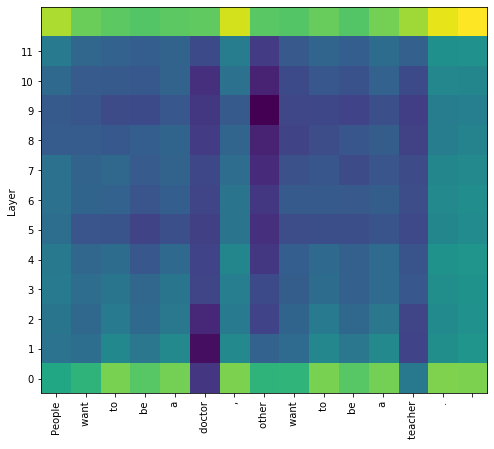

In [16]:
for i in range(10):
    print("===== Example {} =====".format(i))
    pprint.pprint(gec_data[i])
    all_layer_scores(sentences[i])

## Interpretations
I think this GMM model highlights the words with the highest semantic surprisal, but typos sometimes occur at places where we do not notice. Esp: the preposition typos.